In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def khan_algo(graph):
    que = {graph.indegree()}    
    


True

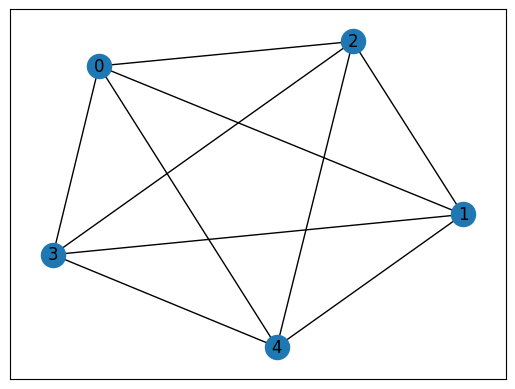

In [28]:
G= nx.complete_graph(5)
G1 = nx.complete_graph(4)
nx.draw_networkx(G)
nx.has_eulerian_path(G)
nx.is_eulerian(G)

In [38]:
from itertools import permutations
def has_hamiltonian_path(graph):
    all_hamiltonian_path =[]
    nodes = G.nodes()
    for perm in permutations(nodes):
        if all(G.has_edge(perm[i], perm[i+1]) for i in range(len(perm)-1)) and G.has_edge(perm[-1], perm[0]):
            all_hamiltonian_path.append(perm)
    return all_hamiltonian_path


120

In [56]:
def euler_path(graph):
    degree = dict(graph.degree())
    count = 0
    even_c = 0
    for values in degree.values():
        if values % 2 != 0:
            count+=1
        elif values % 2 == 0:
            even_c+=1   
    if count > 2:
        return 'No Euler Path'
    elif count == 2:
        return 'Euler path Present'
    elif even_c == len(degree):
        return 'Euler tour present'
    
euler_path(G)

'Euler tour present'

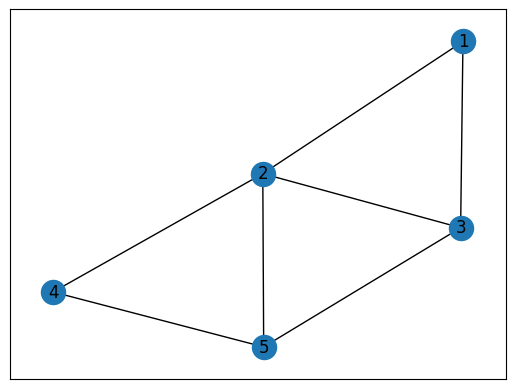

In [94]:
color_graph = nx.Graph()
edges = [(1,2),(1,3),(2,3),(2,4),(2,5),(4,5),(3,5)]
color_graph.add_edges_from(edges)
nx.draw_networkx(color_graph)


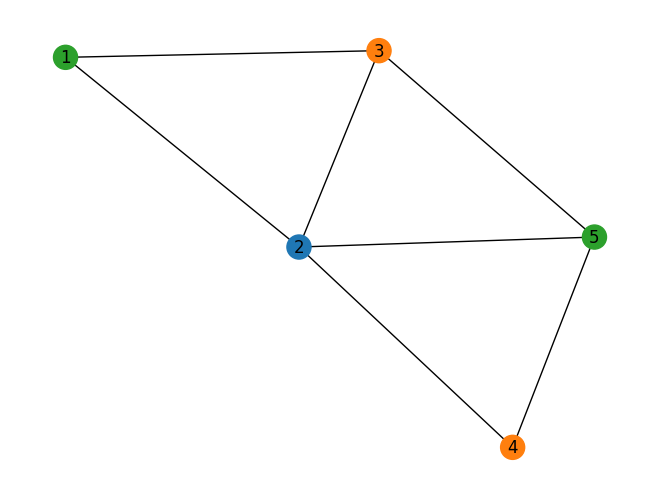

In [95]:
import matplotlib.colors as mpl

graph = nx.greedy_color(color_graph)
num_color = set(graph.values())

unique_color = {num:list(mpl.TABLEAU_COLORS)[i] for i, num in enumerate(list(num_color))}
unique_color


unique_color, 
# for nodes in list(color_graph.nodes()):
#     color_graph.nodes[nodes]['color'] = unique_color[graph[nodes]]
node_c = [unique_color[graph[nodes]] for nodes in color_graph.nodes()]
pos = nx.spring_layout(color_graph)
nx.draw(color_graph,pos, node_color = node_c, with_labels=True)
plt.show()
#nodes, graph


In [81]:
G.add_nodes_from([2,3])
print(G)
G.add_nodes_from([(4, {"color": "red"}), (5, {"color": "green"})])

print(G)

Graph with 3 nodes and 0 edges
Graph with 5 nodes and 0 edges


In [82]:
H = nx.path_graph(10)
G.add_node(H)
print(G)

Graph with 6 nodes and 0 edges


In [83]:
G.add_edge(1,2)
print(G)
e = (2,3)
G.add_edge(*e)
print(G)

Graph with 6 nodes and 1 edges
Graph with 6 nodes and 2 edges


In [84]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1,2)
G.add_node("Spam")
G.add_nodes_from("Spam")
G.add_edge(3,"m")
G.number_of_nodes()

G.number_of_edges()


4

In [85]:
DG = nx.DiGraph()
DG.add_edge(2,1)
DG.add_edge(1,3)
DG.add_edge(2,4)
DG.add_edge(1,2)
assert list(DG.successors(2)) == [1,4]
assert list (DG.edges) == [(2,1), (2,4),(1,3),(1,2)]

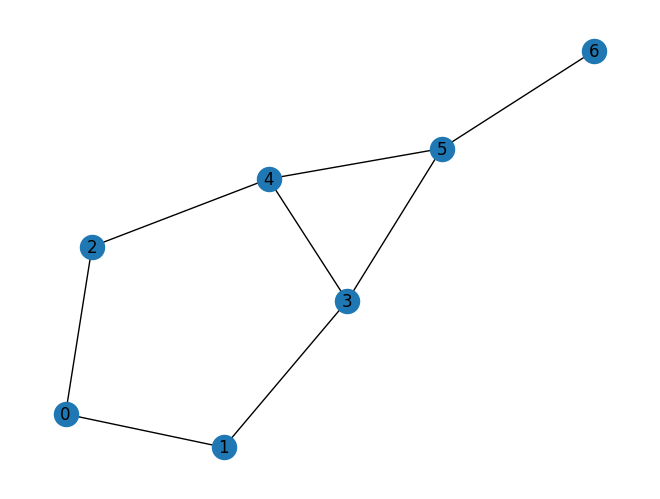

In [97]:
import matplotlib.pyplot as plt
bfs_graph = nx.Graph()
bfs_graph.add_edges_from([(0,1),(0,2),(1,3),(2,4),(3,4),(3,5),(3,1),(4,5),(4,2),(5,6)])
nx.draw_spring(bfs_graph, with_labels = True)
plt.show()

In [115]:

def new_bfs(graph,start_node):
    que = []
    que.append(start_node)
    visited = []
    while(que):
        node = que.pop(0)
        if node not in visited:
            visited.append(node)
            que.extend([n for n in graph.neighbors(node)])
    return visited

In [117]:
# [0, 1, 2, 3, 4, 5, 6]
new_bfs(bfs_graph,0)

[0, 1, 2, 3, 4, 5, 6]

In [ ]:
#bfs with nx graph
from collections import deque
def bfs(graph, start_node):
    que = deque()
    que.append(start_node)
    visited = []
    while (que):
        next_val = que.popleft()
        if next_val not in visited:
            visited.append(next_val)
            que.extend([n for n in graph.neighbors(next_val)])
    return visited




In [ ]:
bfs(bfs_graph,0)

[6, 5, 3, 4, 1, 2, 0]

In [90]:
#dfs with nx graph
def dfs(graph, visited, current_node):
    print(current_node)
    visited[current_node] = True
    for nodes in graph.neighbors(current_node):
        if visited[nodes] == False:
            dfs(graph,visited,nodes)
    
visited = {nodes : False for nodes in bfs_graph.nodes}
current_node = 0
dfs(bfs_graph, visited,current_node)

0
1
3
4
2
5
6


In [120]:
def dfs(graph, visited, current_node,result):
    visited[current_node]= True
    result.append(current_node)
    for nodes in graph.neighbors(current_node):
        if visited[nodes] == False:
            dfs(graph, visited, nodes,result)
    return result
visited ={nodes:False for nodes in bfs_graph.nodes}
dfs(bfs_graph,visited,0,[])

0
1
3
4
2
5
6


[0, 1, 3, 4, 2, 5, 6]

In [91]:
# printing all path from source to destination
visited = {nodes : False for nodes in bfs_graph.nodes}
source = 0
destination = 5
path ="0"
def graph_traversal(graph, visited, current_node, path, destination):
    if current_node == destination:
        print(path)
        return 
    for nodes in graph.neighbors(current_node):
        if visited[nodes] == False:
            visited[nodes] = True
            graph_traversal(graph, visited, nodes,path+str(nodes),destination)
            visited[nodes] = False

graph_traversal(bfs_graph,visited, source, path,destination)



0102435
010245
01345
0135
0201345
020135
02435
0245


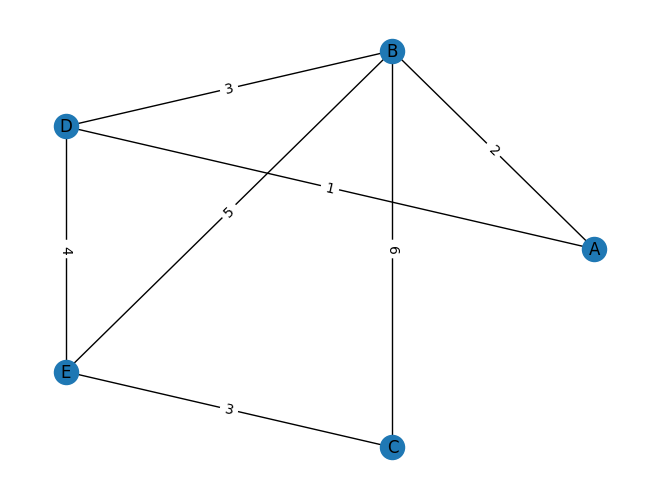

In [270]:
# djkastra algorithm

weighted_graph = nx.Graph()
edges = [("A","B",2),("A","D",1),("D","B",3),("D","E",4),("B","E",5),("B","C",6),("E","C",3)]
weighted_graph.add_weighted_edges_from(edges)
labels = nx.get_edge_attributes(weighted_graph,'weight')
pos=nx.circular_layout(weighted_graph)
nx.draw(weighted_graph, pos, with_labels=True)

nx.draw_networkx_edge_labels(weighted_graph, pos, edge_labels=labels)
plt.show()





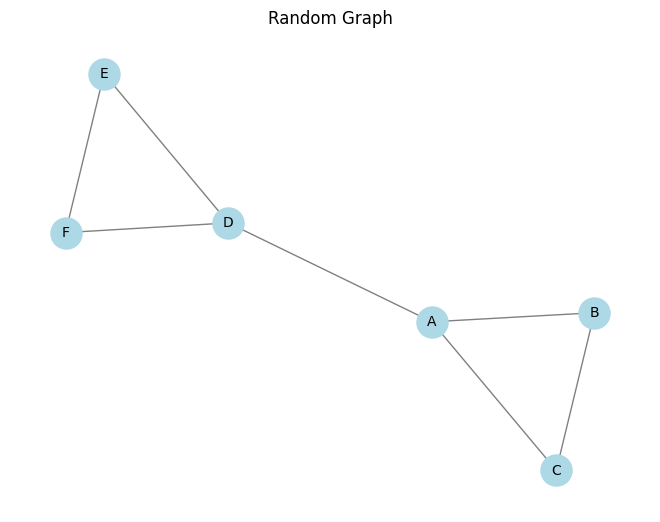

In [297]:
G = nx.Graph()
edges = [('A', 'B'), ('A', 'C'), ('B', 'C'), ('D', 'E'), ('D','A'),('D', 'F'), ('E', 'F')]
G.add_edges_from(edges)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, edge_color='gray')
plt.title('Random Graph')
plt.show()


In [298]:
nx.adjacency_matrix(weighted_graph).toarray()
n_cluster = 5
laplacian_matrix = nx.laplacian_matrix(weighted_graph).toarray()
eigen_values, eigen_vector = np.linalg.eigh(laplacian_matrix)
# eigen_vector = np.argsort(eigen_vector)
# vecs = eigen_vector[:, eigen_values[1:n_cluster]]
s = eigen_vector[:,1:n_cluster]
's',s, eigen_vector

('s',
 array([[ 0.88475316, -0.0905977 , -0.02444254,  0.0916868 ],
        [-0.15307349, -0.14457984, -0.07207331, -0.86629707],
        [-0.14615697,  0.75366571,  0.44930867,  0.09352996],
        [-0.27039978,  0.10713122, -0.7805894 ,  0.32571007],
        [-0.31512292, -0.62561939,  0.42779657,  0.35537025]]),
 array([[-0.4472136 ,  0.88475316, -0.0905977 , -0.02444254,  0.0916868 ],
        [-0.4472136 , -0.15307349, -0.14457984, -0.07207331, -0.86629707],
        [-0.4472136 , -0.14615697,  0.75366571,  0.44930867,  0.09352996],
        [-0.4472136 , -0.27039978,  0.10713122, -0.7805894 ,  0.32571007],
        [-0.4472136 , -0.31512292, -0.62561939,  0.42779657,  0.35537025]]))

1
1
1
0
0
0


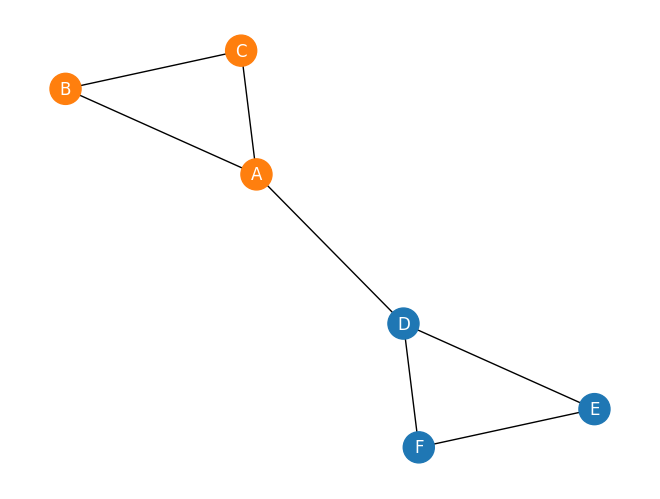

In [309]:
# laplacian matrix is a symmetric matrix
from sklearn.cluster import KMeans
import matplotlib.colors  as mcolors
import numpy as np

def unnormalized_spetral_clustering(graph, cluster_number):
    laplacian_matrix = nx.laplacian_matrix(graph).toarray()
    eigen_values, eigen_vector = np.linalg.eig(laplacian_matrix)
    eigen_values= np.argsort(eigen_values)
    eigen_vectors = eigen_vector[:,eigen_values[1:cluster_number]]
    # kmeans_cluster = KMeans(n_clusters=cluster_number).fit(eigen_vector)
    kmeans = KMeans(n_clusters=cluster_number, random_state=0).fit(eigen_vectors)
    labels = kmeans.labels_
    # clus=  kmeans_cluster.fit(eigen_vector)
    
    return labels.tolist()
    

    

    
graph_labels = unnormalized_spetral_clustering(G, 2)

for node,labels in zip(G.nodes,graph_labels):
    G.nodes[node]['cluster'] = labels
    print(labels)

nx.get_node_attributes(G,'cluster')
color_map = list(mcolors.TABLEAU_COLORS.values())
node_color = [ color_map[G.nodes[node]['cluster']] for node in G.nodes]

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color= node_color, with_labels = True, node_size = 500, font_color = 'White')
plt.show()



In [317]:
def eig(A):
    vals, vecs= np.linalg.eig(A)
    sorted_indices = np.argsort(vals)
    vals = vals[sorted_indices]
    vecs = vecs[:,sorted_indices]
    return vals, vecs
laplacian_matrix = nx.laplacian_matrix(G).toarray()
vals, vecs = eig(laplacian_matrix)
eig_val, eig_vecs = np.linalg.eigh(laplacian_matrix)
vals, vecs, eig_val, eig_vecs

(array([1.89015858e-16, 4.38447187e-01, 3.00000000e+00, 3.00000000e+00,
        3.00000000e+00, 4.56155281e+00]),
 array([[-0.40824829, -0.26095647,  0.57735027, -0.07858105,  0.15417637,
          0.6571923 ],
        [-0.40824829, -0.46470513, -0.28867513,  0.38573547, -0.75681475,
         -0.18452409],
        [-0.40824829, -0.46470513, -0.28867513, -0.30715442,  0.60263838,
         -0.18452409],
        [-0.40824829,  0.26095647,  0.57735027, -0.07858105,  0.15417637,
         -0.6571923 ],
        [-0.40824829,  0.46470513, -0.28867513, -0.56957188, -0.02896058,
          0.18452409],
        [-0.40824829,  0.46470513, -0.28867513,  0.64815293, -0.12521579,
          0.18452409]]),
 array([-1.12546300e-16,  4.38447187e-01,  3.00000000e+00,  3.00000000e+00,
         3.00000000e+00,  4.56155281e+00]),
 array([[ 0.40824829, -0.26095647, -0.19775529, -0.08494535,  0.53573358,
          0.6571923 ],
        [ 0.40824829, -0.46470513, -0.52106779,  0.32886581, -0.45129699,
         -0

[1, 1, 1, 0, 0, 0]
1
1
1
0
0
0


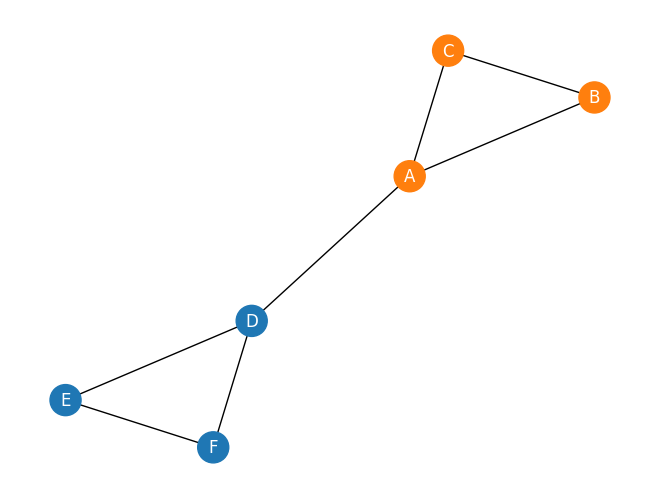

In [96]:
adj_A = nx.adjacency_matrix(G).toarray()
adj_A
diag_val = []
for row in adj_A:
    diag_val.append(sum(row))
    
diag_matrix = np.diag(diag_val)
n = len(diag_matrix)
diag_matrix = np.diag(adj_A.sum(axis=1))
diag_matrix_inv_sqrt =  np.sqrt(np.linalg.inv(diag_matrix))
normalized_lapcian = np.identity(n) - (diag_matrix_inv_sqrt @ adj_A @ diag_matrix_inv_sqrt )
normalized_lapcian
eigen_values, eigen_vector = np.linalg.eigh(normalized_lapcian)
cluster_number =2
eigen_vector = eigen_vector[:,:cluster_number]
k_means = KMeans(n_clusters=cluster_number).fit(eigen_vector)
labels = k_means.labels_.tolist()
print(labels)

for node,labels in zip(G.nodes,graph_labels):
    G.nodes[node]['cluster'] = labels
    print(labels)

color_map = list(mcolors.TABLEAU_COLORS.values())
node_color = [ color_map[G.nodes[node]['cluster']] for node in G.nodes]

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color= node_color, with_labels = True, node_size = 500, font_color = 'White')
plt.show()

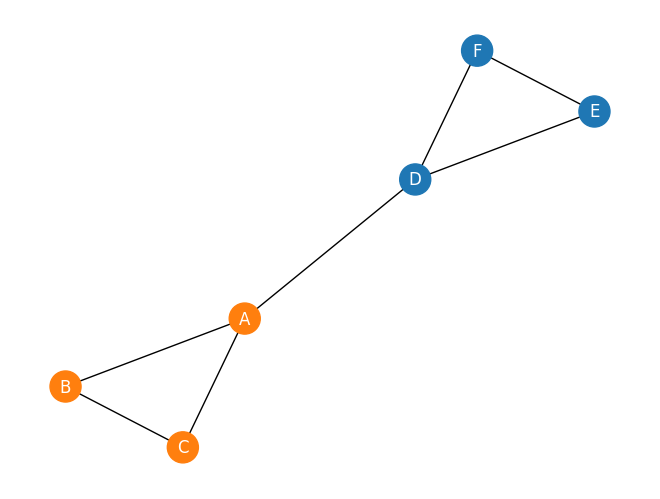

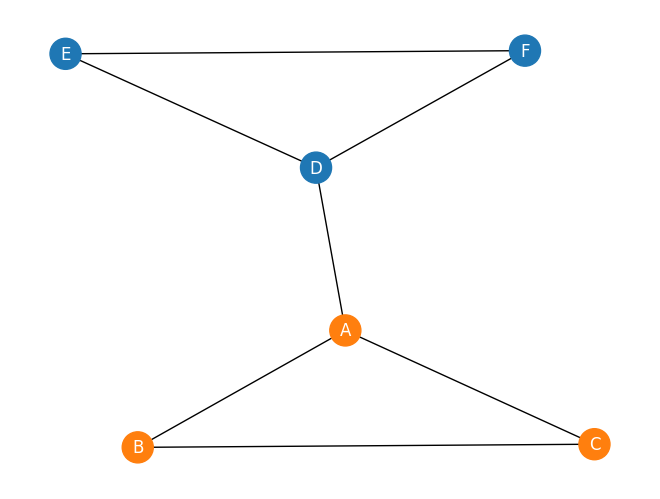

In [343]:
def normalized_laplasian_matrix(graph):
    
    adj_A = nx.adjacency_matrix(graph)
    diag_d = np.diag(adj_A.sum(axis =1))
    inv_diag_d = np.linalg.inv(diag_d)
    l_sym = np.eye(*adj_A.shape) - ( np.sqrt(inv_diag_d) @ adj_A @ np.sqrt(inv_diag_d))
    
    return l_sym

def normalized_matrix(matrix):
    for row_index, element in enumerate(matrix):
     sum_sq_row = np.sum(matrix[row_index,:] **2)
     for col_index,elm in enumerate(element):
        matrix[row_index, col_index] = elm/ np.sqrt(sum_sq_row)
    return matrix

def r_w_laplacian_matrix(graph):
    adj_A = nx.adjacency_matrix(graph)
    diag_d = np.diag(adj_A.sum(axis =1))
    inv_diag_d = np.linalg.inv(diag_d)
    l_r_w = np.eye(*adj_A) - (inv_diag_d @ adj_A)
    return l_r_w
    
def normalized_cluster(graph, k):
    l_sym = normalized_laplasian_matrix(graph)
    eigen_values,eigen_vectors = np.linalg.eigh(l_sym)
    kth_eigen_vecs = eigen_vectors[:,1:k]
    #norm_matrix = normalized_matrix(kth_matrix)
    norms = np.linalg.norm(kth_eigen_vecs, axis = 1,keepdims=True)
    norm_matrix = kth_eigen_vecs/norms
    
    cluster = KMeans(n_clusters=k).fit(norm_matrix)
    labels = cluster.labels_.tolist()
    return labels

def normalized_clustering_with_unnormalized_laplacian(graph,k):

    norm_lapcian = normalized_laplasian_matrix(graph)
    
    eigen_values,eigen_vectors = np.linalg.eigh(norm_lapcian)
    
    kth_matrix = eigen_vectors[:,1:k]    
    cluster = KMeans(n_clusters=k).fit(kth_matrix)
    labels = cluster.labels_.tolist()
    return labels

    
    
    
def colored_graph (graph,labels):
    
    for node,labels in zip(graph.nodes,graph_labels):
        graph.nodes[node]['cluster'] = labels
        
    color = list(mcolors.TABLEAU_COLORS.values())
    node_c = [color[graph.nodes[node]['cluster']] for node in graph.nodes]
    
    pos = nx. spring_layout(graph)
    nx.draw(graph, pos, node_color = node_c,node_size = 500, with_labels = True, font_color = 'white')
    
    plt.show()
    
labels = normalized_cluster (G,2)
colored_graph(G,labels)
    
    
labels = normalized_clustering_with_unnormalized_laplacian (G,2)
colored_graph(G,labels)
    

In [98]:
adj_A = nx.adjacency_matrix(G).toarray()
diag_d = np.diag(adj_A.sum(axis= 1))
inv_diag_d = np.linalg.inv(diag_d)

l_sym = np.eye(*adj_A.shape) - (np.sqrt(inv_diag_d) @ adj_A @ np.sqrt(inv_diag_d))
l_sym
l_rw = np.eye(*adj_A.shape) - (inv_diag_d @ adj_A)
l_rw

def normalized_laplasian_matrix(graph):
    
    adj_A = nx.adjacency_matrix(graph)
    diag_d = np.diag(adj_A.sum(axis =1))
    inv_diag_d = np.linalg.inv(diag_d)
    l_sym = np.eye(*adj_A.shape) - ( np.sqrt(inv_diag_d) @ adj_A @ np.sqrt(inv_diag_d))
    
    return l_sym

l_sym = normalized_laplasian_matrix(G)
k = 3
eigen_values, eigen_vectors = np.linalg.eigh(l_sym)
u_k = eigen_vectors[:,:k]

print(u_k)

norm = np.linalg.norm(u_k, axis =1, keepdims=True)
T = u_k /norm

for row_index, element in enumerate(u_k):
     sum_sq_row = np.sum(u_k[row_index,:] **2)
     for col_index,elm in enumerate(element):
        u_k[row_index, col_index] = elm/ np.sqrt(sum_sq_row)
print('T', T)
print(u_k)

[[ 0.46291005 -0.32202262 -0.53452248]
 [ 0.37796447 -0.44514123  0.32732684]
 [ 0.37796447 -0.44514123  0.32732684]
 [ 0.46291005  0.32202262 -0.53452248]
 [ 0.37796447  0.44514123  0.32732684]
 [ 0.37796447  0.44514123  0.32732684]]
T [[ 0.59578085 -0.41445397 -0.68794846]
 [ 0.56459748 -0.66494508  0.48895576]
 [ 0.56459748 -0.66494508  0.48895576]
 [ 0.59578085  0.41445397 -0.68794846]
 [ 0.56459748  0.66494508  0.48895576]
 [ 0.56459748  0.66494508  0.48895576]]
[[ 0.59578085 -0.41445397 -0.68794846]
 [ 0.56459748 -0.66494508  0.48895576]
 [ 0.56459748 -0.66494508  0.48895576]
 [ 0.59578085  0.41445397 -0.68794846]
 [ 0.56459748  0.66494508  0.48895576]
 [ 0.56459748  0.66494508  0.48895576]]


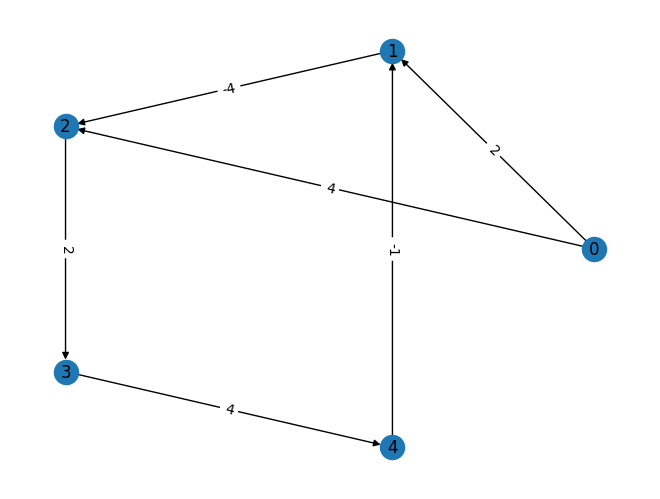

In [99]:
bellman_graph = nx.DiGraph()
edges = [(0,1,2),(0,2,4),(2,3,2),(1,2,-4),(4,1,-1),(3,4,4)]

bellman_graph.add_weighted_edges_from(edges)
labels = nx.get_edge_attributes(bellman_graph,'weight')
pos=nx.circular_layout(bellman_graph)
nx.draw(bellman_graph, pos, with_labels=True)
nx.draw_networkx_edge_labels(bellman_graph, pos, edge_labels=labels)
plt.show()

In [100]:
# Bellman ford does not work on negative weight cycle graph
# in negative weight cycle graph we can not find the shortest path

def bellman_ford(graph, source):

    distance = { node: (0 if node == source else np.inf ) for node in graph.nodes }
    # print(distance)
    node_number = graph.number_of_nodes()
    # print(node_number)
    loop_count = node_number - 1
    # print(loop_count)
    count = 0
    while loop_count:
        for edges in graph.edges:
            edge_weight = graph.get_edge_data(edges[0],edges[1]).get('weight')
            # print(edges, edge_weight)
            if distance[edges[0]] + edge_weight < distance[edges[1]]:
                # print(distance)
                distance[edges[1]] = distance[edges[0]] + edge_weight
        loop_count-=1

    return distance


bellman_ford(bellman_graph, 0)


{0: 0, 1: 2, 2: -2, 3: 0, 4: 4}

In [101]:
# Dijkastra algorithm does not gurrantee the shortest path
# when the weight of the edges is  negative

from heapq import heappop, heappush
import numpy as np

def dijkastra(graph, source):  
    priority = []
    heappush(priority,(0, source))
    distance = {node:( 0 if node == source else np.inf ) for node in list(weighted_graph.nodes)}
    visited = {nodes: False for nodes in list(weighted_graph.nodes)}
    while(priority):
        _, nodes = heappop(priority)
        if (visited[nodes] != True):
            visited[nodes] = True
            for neighbor in list(graph.neighbors(nodes)):
                edge_weight = graph.get_edge_data(nodes,neighbor).get('weight')
                if distance[nodes] + edge_weight <  distance[neighbor]:
                    distance[neighbor] = distance[nodes] + edge_weight
                    heappush(priority, (distance[neighbor], neighbor))
    return distance

dijkastra(weighted_graph, "A")

                
            
            
        


{'A': 0, 'B': 2, 'D': 1, 'E': 5, 'C': 8}

In [ ]:
cluster_graph = 

In [275]:
from heapq import heappush,heappop
def djks(graph, source):
    priority =[]
    heappush(priority,(0,source))
    distance= {node: (np.inf if node != source else 0 ) for node in graph.nodes }
    visited = {nodes: False for nodes in graph.nodes}
    while(priority):
        weight, node = heappop(priority)
        if (visited != True):
            visited[node] = True
            for neighbor in graph.neighbors(node):
                edge_weight = graph.get_edge_data(node,neighbor)['weight']
                if weight + edge_weight < distance[neighbor]:
                    distance[neighbor] = weight + edge_weight
                    heappush(priority,(distance[neighbor],neighbor))
    return distance
            
            
        
    
    
    

In [277]:
djks(weighted_graph,"A")

{'A': 0, 'B': 2, 'D': 1, 'E': 5, 'C': 8}

In [289]:
def source_dest_shortest_path(graph, source, dest):
    priority = []
    heappush(priority,(0,source))
    distance = {node: ( np.inf if node !=source else 0) for node in graph.nodes}
    prev_node = {node : None for node in graph.nodes}
    visited = []
    while (priority):
        node_weight, current_node = heappop(priority)
        if current_node in visited:
            continue
        visited.append(current_node)
        if current_node == dest:
            path= []
            while (prev_node[current_node] is not None):
                path.append(current_node)
                current_node = prev_node[current_node]
            path.append(source)
            return list(reversed(path)), distance[dest]
        
        for neighbors in graph.neighbors(current_node):
            edge_weight = graph.get_edge_data(current_node,neighbors)['weight']
            new_distance = node_weight + edge_weight
            if new_distance < distance[neighbors]:
                distance[neighbors] = new_distance
                prev_node[neighbors]= current_node
                heappush(priority,(new_distance,neighbors))

        
        
    
    

In [290]:

source = "A"
destination = "C"
source_dest_shortest_path(weighted_graph,source,destination)

(['A', 'B', 'C'], 8)

In [278]:
def shortest_path_source_dest(graph, source, destination):

    priority = []
    heappush(priority,(0,source))
    
    # Initially all the distances from the source is infinity
    # only the source to source distance is 0

    distance = {nodes : (0 if nodes == source else np.inf) for nodes in list(graph.nodes)}

    visited = set()

    previous_nodes = {nodes: None for nodes in list(graph.nodes)}


    while priority:

        current_distance, current_node = heappop(priority)
        
        # If the node is already visited, skip it
        if current_node in visited:
            continue
        
        visited.add(current_node)
        
        # If the destination node is reached, return the distance

        if current_node == destination:
            path = []
            while previous_nodes[current_node] is not None:
                # backtracking it. that's why adding it into the 0th positions
                path.insert(0,current_node)
                current_node = previous_nodes[current_node]
            # Add the source node to get the path from source to destinations
            path.insert(0,source)
            
            return path, distance[destination]
        
        for neighbor in graph.neighbors(current_node):
            # print(neighbor, " c", current_node)
            # distance = graph[current_node][neighbour]['d']
            edge_data = graph.get_edge_data(current_node, neighbor)

            for values in edge_data.values():
                edge_weight = values
                break

            # print('edge_weight', type(edge_weight))
            new_distance = current_distance + edge_weight
            
            if new_distance < distance[neighbor]:
                distance[neighbor] = new_distance
                previous_nodes[neighbor] = current_node
                heappush(priority, (new_distance, neighbor))

    
    return None, np.inf

source = "A"
destination = "C"

shortest_path_source_dest(weighted_graph,source, destination)

(['A', 'B', 'C'], 8)

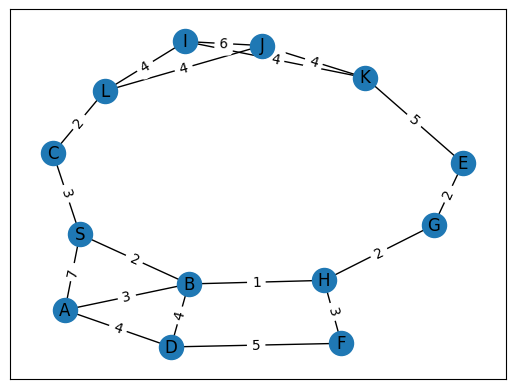

In [103]:
test_graph = nx.Graph()
test_graph.add_edges_from([
    ('S', 'A', {'d': 7}),
    ('S', 'B', {'d': 2}),
    ('S', 'C', {'d': 3}),
    ('A', 'B', {'d': 3}),
    ('A', 'D', {'d': 4}),
    ('B', 'D', {'d': 4}),
    ('B', 'H', {'d': 1}),
    ('C', 'L', {'d': 2}),
    ('D', 'F', {'d': 5}),
    ('H', 'F', {'d': 3}),
    ('H', 'G', {'d': 2}),
    ('G', 'E', {'d': 2}),
    ('L', 'I', {'d': 4}),
    ('L', 'J', {'d': 4}),
    ('I', 'J', {'d': 6}),
    ('I', 'K', {'d': 4}),
    ('J', 'K', {'d': 4}),
    ('E', 'K', {'d': 5}),
])

for edge in test_graph.edges:
    distance = test_graph.edges[edge]['d']
    test_graph.edges[edge]['w'] = 1 / distance

pos = nx.spring_layout(test_graph, weight='w', iterations=250)
nx.draw_networkx(test_graph, pos=pos)
labels = nx.get_edge_attributes(test_graph, 'd')
nx.draw_networkx_edge_labels(test_graph, pos=pos, edge_labels=labels)
plt.show()



In [104]:
edge_weight = test_graph.get_edge_data("S", "A")
edge_weight


{'d': 7, 'w': 0.14285714285714285}

In [105]:
source = "S"
destination = "E"
shortest_path_source_dest(test_graph, source, destination)

(['S', 'B', 'H', 'G', 'E'], 7)

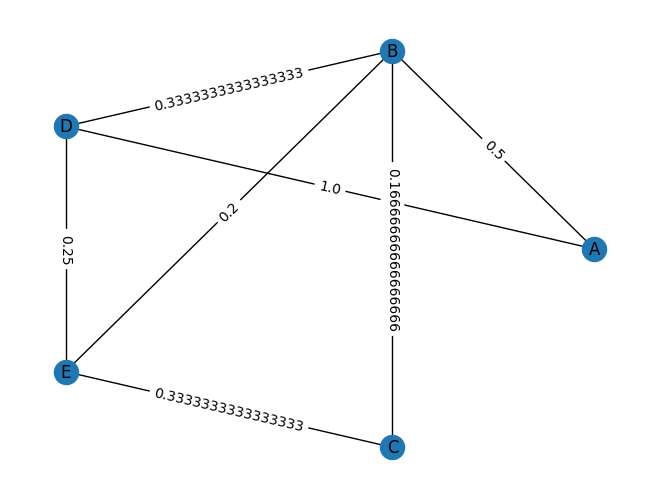

{('A', 'B'): Text(0.39980022577711805, -0.3037789521127734, '0.5'),
 ('A', 'D'): Text(0.6556584565251595, -0.09599499259915434, '1.0'),
 ('B',
  'D'): Text(0.2982271197706967, -0.06603762101907656, '0.3333333333333333'),
 ('B', 'E'): Text(-0.15565865285116254, 0.0731036885717451, '0.2'),
 ('B',
  'C'): Text(-0.47882542923575167, -0.1140158129915726, '0.16666666666666666'),
 ('D', 'E'): Text(0.10021286273560914, 0.28088351455553884, '0.25'),
 ('E',
  'C'): Text(-0.6768414769582417, 0.2329069513075519, '0.3333333333333333')}

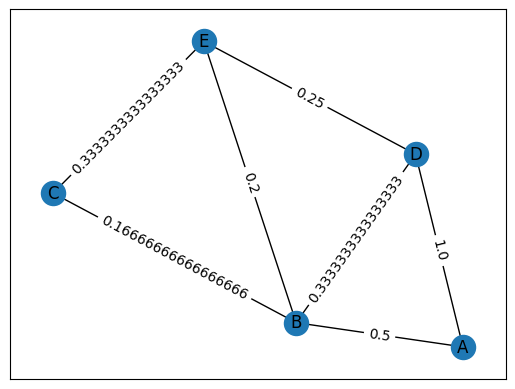

In [106]:
for edges in weighted_graph.edges:
    distance = weighted_graph.edges[edges]['weight']
    weighted_graph.edges[edges]['weight'] = 1/distance



labels = nx.get_edge_attributes(weighted_graph,'weight')
pos=nx.circular_layout(weighted_graph)
nx.draw(weighted_graph, pos, with_labels=True)
nx.draw_networkx_edge_labels(weighted_graph, pos, edge_labels=labels)
plt.show()

pos = nx.spring_layout(weighted_graph, iterations=250)
nx.draw_networkx(weighted_graph, pos=pos)
nx.draw_networkx_edge_labels(weighted_graph, pos=pos, edge_labels=labels)

In [107]:
priority = []
heappush(priority,(0, "A"))
heappush(priority,(1, "B"))

weight, nodes = heappop(priority)
edge = weighted_graph.get_edge_data("B","E").get('weight')
edge

0.2

['B', 'A', 'D', 'C', 'E']

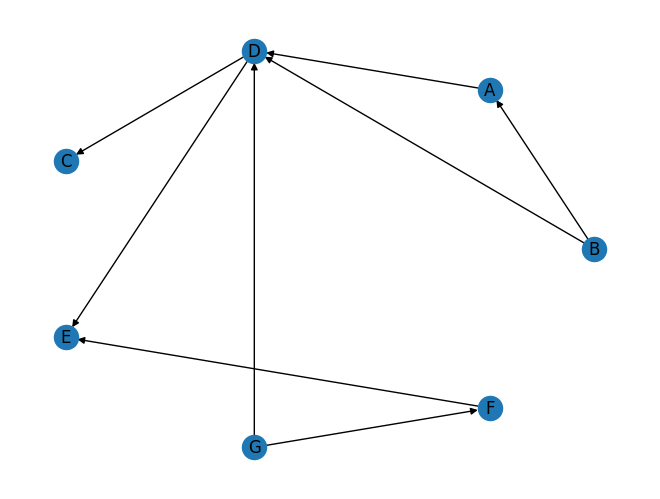

In [197]:
dag = nx.DiGraph()
edges =[("B","A"), ("A","D"),("B","D"),("D","C"),("D","E"), ("G","D"), ("G","F"),("F","E") ]
dag.add_edges_from(edges)
nx.draw_circular(dag, with_labels = True)
bfs(dag,"B")

In [268]:
def topolocal_sort_helper(graph, visited,current_node,stack):
    visited[current_node]= True
    for neighbors in graph.successors(current_node):
        if visited[neighbors] == False:
            topolocal_sort_helper(graph,visited,neighbors,stack)
    
    stack.append(current_node)
    # print(stack)
    
def top_sort(graph):
    visited = {nodes: False for nodes in graph.nodes}
    stack = []
    for nodes in graph.nodes:
        if visited[nodes] == False:
            topolocal_sort_helper(graph,visited,nodes,stack)
    # print(stack)
    print(list(reversed(stack)))

In [267]:
top_sort(dag)

['B', 'A', 'D', 'C', 'E', 'G', 'F']
['G', 'F', 'B', 'A', 'D', 'E', 'C']


In [186]:
def khan(graph):
    #que = [values[0] for values in graph.in_degree() if values[1] == 0]
    que= [values[0] for values in graph.in_degree() if values[1] == 0]
    in_degree = {values[0]:values[1] for values in dag.in_degree()}
    sorted = []
    while(que):
        node = que.pop(0)
        sorted.append(node)
        # print(sorted)
        for neighbor in list(graph.successors(node)):
            in_degree[neighbor]-=1
            if in_degree[neighbor]== 0:
                que.append(neighbor)
    # if graph.number_of_edges()>0:
    #     return 'Error'
    flags = all( True for values in in_degree.values() if values ==0 )
    if flags:
        return sorted
    else:
        ' There is an cycle in the graph'
    

In [269]:
dag.in_degree('B')
khan(dag)

['B', 'G', 'A', 'F', 'D', 'C', 'E']

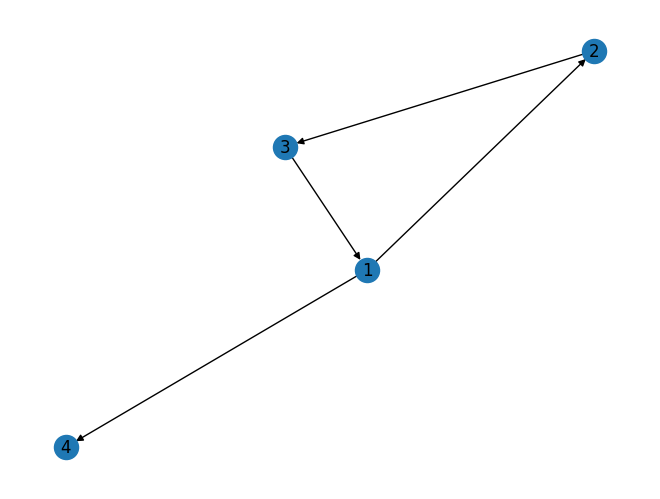

[1, 2, 4, 3]

In [109]:
c = nx.DiGraph()
ed = [(1,2),(2,3),(3,1),(1,4)]
c.add_edges_from(ed)
nx.draw_spring(c,with_labels = True)
plt.show()
bfs(c,1)

In [110]:
bfs(dag,"G")

['G', 'D', 'F', 'C', 'E']

In [111]:
#bfs with nx graph
def bfs_2(graph, start_node):
    que = [start_node]
    visited = []
    while (que):
        next_val = que.pop(0)
        if next_val not in visited:
            visited.append(next_val)
            que.extend([n for n in graph.neighbors(next_val)])
            print(que)

    return visited


In [112]:
bfs_2(dag,"B")

['A', 'D']
['D', 'D']
['D', 'C', 'E']
['E']
[]


['B', 'A', 'D', 'C', 'E']

In [113]:
print(dag.in_degree())


[('B', 0), ('A', 1), ('D', 3), ('C', 1), ('E', 2), ('G', 0), ('F', 1)]


In [165]:
#khans algorithms
def kahns_algorithm(graph):
    que= [values[0] for values in graph.in_degree() if values[1] == 0]
    in_degree = {}
    for values in graph.in_degree():
        in_degree[values[0]] = values[1]
    sorted = []
    while(que):
        next_val = que.pop(0)
        # print(next_val)
        sorted.append(next_val)
        for succesors in list(graph.successors(next_val)):
            in_degree[succesors] -= 1
            # print(in_degree)
            if in_degree[succesors] == 0:
                que.append(succesors)
    flag = all(value == 0 for value in in_degree.values())
    if flag:
         return sorted
    else:
        return "There is a cycle in graph"


print(kahns_algorithm(dag))


['B', 'A', 'D', 'C', 'E', 'G', 'F']


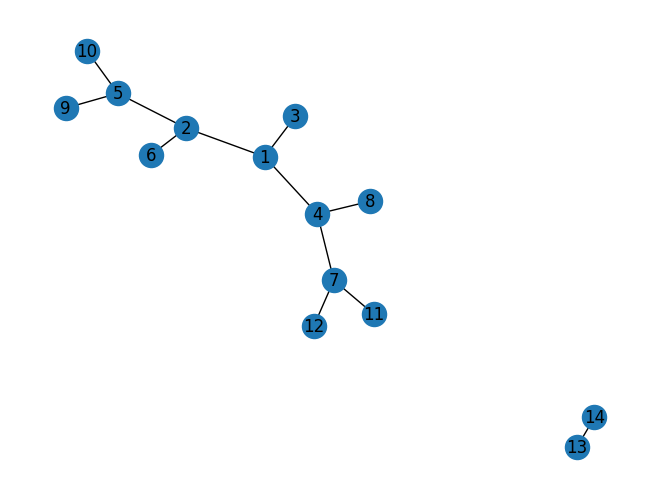

In [115]:
edges = [
        (1, 2), (1, 3), (1, 4), (2, 5), (2, 6), (5, 9),
        (5, 10), (4, 7), (4, 8), (7, 11), (7, 12), (13,14)
        # vertex 0, 13, and 14 are single nodes
    ]

graph = nx.Graph()
graph.add_edges_from(edges)
nx.draw_spring(graph, with_labels = True)
# print(graph.nodes[5])

In [116]:
#bfs for graph with subgraph 

from collections import defaultdict

def bfs(graph, visited, start_node):

    que = [start_node]
    while (que):
        next_val = que.pop(0)
        if not visited[next_val]:
            print(next_val)
            visited[next_val] = True
            que.extend([n for n in graph.neighbors(next_val)])

edges = [
        (1, 2), (1, 3), (1, 4), (2, 5), (2, 6), (5, 9),
        (5, 10), (4, 7), (4, 8), (7, 11), (7, 12) , (13,14) ]

graph = nx.Graph()
graph.add_edges_from(edges)

visited_nodes ={nodes : False for nodes in graph.nodes}
# print(visited_nodes[15])

# print(visited_nodes)
bfs_traverse = []
for nodes in visited_nodes.keys():
    # print('nodes', nodes)
    if visited_nodes[nodes] == False:
        bfs(graph,visited_nodes, nodes)


1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [257]:
from collections import deque
class UndirectedGraph:
    """
    This graph is generated for undirected graph
    """

    def __init__(self) -> None:
        self.graph = defaultdict(list)
    
    # def find_neigbour(self, node):
    #     val = self.graph.get(node, None)
    #     if val is not None:
            
    #         parent = [key for key, values in self.graph.items() if node in values]
    #         neighbours = self.graph[node]
    #         neighbours.extend(parent)
    #         return neighbours
    #     else:
    #         return [key for key, values in self.graph.items() if node in values]

    def get_nodes(self):
        # print(self.graph.keys())
        values = set()
        values.update(self.graph.keys())
        values.update(sum(self.graph.values(),[]))
        return values

    def add_node_with_edges(self, source, dest):
        self.graph[source].append(dest)
        self.graph[dest].append(source)
    
    def bfs(self, start_node):
        """ Takes start node and returns
        the traversal route for breadth first search """

        que = deque()
        visited = []
        que.append(start_node)
        while (que):
            next_val = que.popleft()
            for next_val in self.graph[next_val]:
                if next_val not in visited:
                    visited.append(next_val)
                    # neighbour = self.find_neigbour(next_val)
                    # if neighbour is not None:
                    que.append(next_val)

        return visited
    
    def dfs(self, visited, start_node):
        """ Takes the visited node list and start node and returns
        the traversal route for depth first search"""
        print(start_node, " ")
        visited[start_node] = True
        # neighbours = self.find_neigbour(start_node)
        # print("neighbours: ", neighbours)
        for node in self.graph[start_node]:
            if visited[node] == False:
                # print(node)
                self.dfs(visited, node)
    def cycle_counter(self, visited, current_node, parent, count):
        visited[current_node] = True
        for node in self.graph[current_node]:
            if visited[node] == True and parent != node:
                count+=1
            elif visited[node] == False:
                if(self.cycle_counter(visited, node,current_node,count)):
                    count+=1
        
        return count
    def is_cycle_present(self, visited, current_node, parent):
        visited[current_node] = True
        for node in self.graph[current_node]:
            if visited[node] == True and parent != node:
                return True
            elif visited[node] == False:
                if(self.is_cycle_present(visited, node,current_node)):
                    return True
        
        return False


graph = UndirectedGraph()

graph.add_node_with_edges(1, 2)
graph.add_node_with_edges(1, 3)
graph.add_node_with_edges(1, 4)
graph.add_node_with_edges(2,3)
graph.add_node_with_edges(3,4)
graph.add_node_with_edges(2, 5)
graph.add_node_with_edges(2, 6)
graph.add_node_with_edges(5, 9)
graph.add_node_with_edges(5, 10)
graph.add_node_with_edges(4, 7)
graph.add_node_with_edges(4, 8)
graph.add_node_with_edges(7, 11)
graph.add_node_with_edges(7, 12)
graph.add_node_with_edges(13,14) 
 
node_list = graph.get_nodes()
visited_nodes = {nodes: False for nodes in node_list}
# print(visited_nodes)
graph.bfs(7)
            
print(graph.is_cycle_present(visited_nodes, list(node_list)[0], -1))            

# graph.find_neigbour(3)



True


In [294]:
from collections import deque, defaultdict
class DirectedGraph:
    """
    This graph is generated for undirected graph
    """

    def __init__(self) -> None:
        self.graph = defaultdict(list)
    
    # def find_neigbour(self, node):
    #     val = self.graph.get(node, None)
    #     if val is not None:
            #neighbours = self.graph[node]
    #         return neighbours
    #     else:
    #         return None

    def get_nodes(self):
        values = []
        values.extend(self.graph.keys())
        for neighbors in list(self.graph.values()):
            f = sum(neighbors,[])
            if f[0] not in values:
              values.extend(f[0])
        # values.update(sum(self.graph.values(),[]))
        return values
    

    def add_node_with_edges(self, source, dest):
        self.graph[source].append(dest)
    def in_degree(self, node):
        count=0
        for values in self.graph.values():
            if node in values:
                count+=1
        return count
    def out_degree(self,node):
        val = self.graph.get(node, None)
        if val is not None:
            return len(self.graph[node])
        else:
            return 0
    
    def bfs(self, start_node):
        """ Takes start node and returns
        the traversal route for breadth first search """

        que = deque()
        visited = set()
        que.append(start_node)
        while (que):
            next_val = que.popleft()
            for next_val in self.graph[next_val]:
                if next_val not in visited:
                    visited.add(next_val)
                    # neighbour = self.find_neigbour(next_val)
                    # if neighbour is not None:
                    que.append(next_val)

        return visited
    
    def dfs(self, visited, start_node):
        """ Takes the visited node list and start node and returns
        the traversal route for depth first search"""
        print(start_node, " ")
        visited[start_node] = True
        # neighbours = self.find_neigbour(start_node)
        # print("neighbours: ", neighbours)
        for node in self.graph[start_node]:
            if visited[node] == False:
                # print(node)
                self.dfs(visited, node)
                
    def topological_sort_helper(self, visited, curr_node, stack):
        visited[curr_node] = True
        for node in self.graph[curr_node]:
            if visited[node] == False:
                self.topological_sort_helper(visited,node,stack)
        stack.append(curr_node)
     
    def topological_sort(self):
        node_list = self.get_nodes()
        visited_nodes = {nodes: False for nodes in node_list}
        print(visited_nodes)
        stack = []

        for nodes in node_list:
             if visited_nodes[nodes] == False:
                self.topological_sort_helper(visited_nodes,nodes,stack)

        print(list(reversed(stack)))

    def is_cycle_present(self, visited, curr, recursion):
        """ Takes the visited node, current node, recursion stack to detect whether
        there is a cycle present in the graph"""

        visited[curr] = True
        recursion[curr] = True
        for neighbours in self.graph[curr]:
            if recursion[neighbours] == True:
                return True
            elif visited[neighbours] == False:
                if(self.is_cycle_present(visited,neighbours,recursion)):
                    return True
        recursion[curr] = False
        return False
            
        
    

graph = DirectedGraph()
sec_graph = DirectedGraph()

graph.add_node_with_edges(1, 2)
graph.add_node_with_edges(1, 3)
graph.add_node_with_edges(1, 4)
graph.add_node_with_edges(2, 5)
graph.add_node_with_edges(2, 6)
graph.add_node_with_edges(5, 9)
graph.add_node_with_edges(5, 10)
graph.add_node_with_edges(4, 7)
graph.add_node_with_edges(4, 8)
graph.add_node_with_edges(7, 11)
graph.add_node_with_edges(7, 12)
# graph.add_node_with_edges(13,14) 

sec_graph.add_node_with_edges(0,1)
sec_graph.add_node_with_edges(2,1)
sec_graph.add_node_with_edges(2,3)
sec_graph.add_node_with_edges(3,4)
sec_graph.add_node_with_edges(4,2)


# node_list_1 = sec_graph.get_nodes()
# node_list_2 = graph.get_nodes()
# visited_nodes = {nodes: False for nodes in node_list}
# recursion = {nodes: False for nodes in node_list}
# for nodes in node_list:
#     iscycle = sec_graph.is_cycle_present(visited_nodes,nodes,recursion)
#     if iscycle:
#         print(iscycle)
#         break
# print(visited_nodes)
# graph.out_degree(14)
            

# graph.topological_sort()
dir = DirectedGraph()
edges =[("B","A"), ("A","D"),("B","D"),("D","C"),("D","E"), ("G","D"), ("G","F"),("F","E") ]

for edge in edges:
    dir.add_node_with_edges(edge[0],[edge[1]])
# dir.get_nodes()
dir.topological_sort()

{'B': False, 'A': False, 'D': False, 'G': False, 'F': False, 'C': False, 'E': False}


TypeError: unhashable type: 'list'

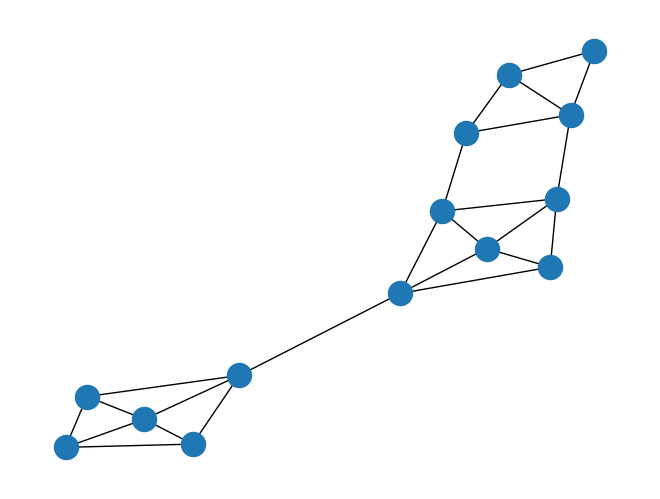

In [347]:
g = nx.Graph()
g.add_edges_from([
    (0, 1),
    (1, 2),
    (2, 3),
    (3, 0),
    (1, 3),
    
    (4, 5),
    (5, 6),
    (6, 7),
    (7, 8), 
    (8, 4),
    (4, 6),
    (6, 8),
    (5, 7),
    
    (9, 10),
    (10, 11),
    (11, 12),
    (12, 13),
    (13, 9),
    (9, 11),
    (10, 12),
    (11, 13),
    
    (2, 4),
    (3, 8),
    (5, 9)    
])
nx.draw(g)

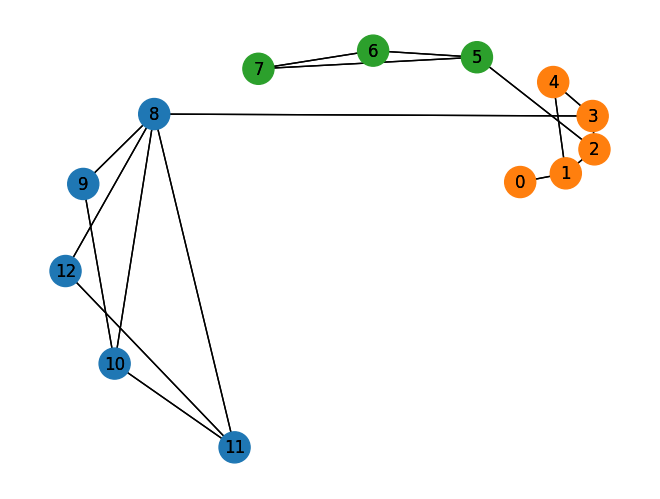

[0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]


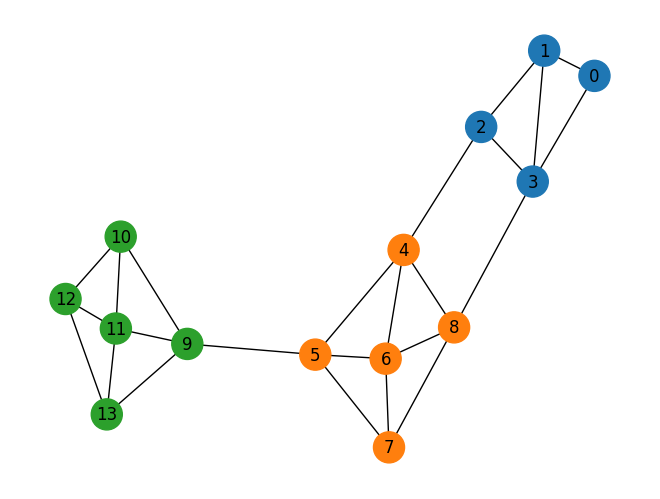

In [351]:
from sklearn.cluster import KMeans
import matplotlib.colors as mc
edge_list = [
    (0,1),
    (1,2),
    (2,3),
    (1,4),
    (4,3),
    (2,5),
    (5,6),
    (5,7),
    (6,7),
    (3,8),
    (8,9),
    (8,12),
    (9,10),
    (8,10),
    (10,11),
    (8,11),
    (11,12),
]
cluster_graph = nx.Graph()
cluster_graph.add_edges_from(edge_list)
pos= nx.spiral_layout(cluster_graph)
nx.draw(cluster_graph, pos, with_labels = True)

def eigen_decomp(M):
    eigh = np.linalg.eig(M)
    vals,vecs = eigh
    sorted_indices = np.argsort(vals)
    vals = vals[sorted_indices]
    vecs = vecs[:,sorted_indices]
    return vals, vecs
def eig(M):
    """
    Calculate the eigenvectors and eigenvalues of M, and sorts them from smallest to largest eigenvalue.
    """
    eigs = np.linalg.eig(M)
    vals, vecs = eigs
    order = np.argsort(vals)
    vecs = vecs[:, order]
    vals = vals[order]
    return vals, vecs
def unormalized_laplacians(graph,k):
    laplacian_matrix = nx.laplacian_matrix(graph).toarray()
    eig_val, eig_vecs = eigen_decomp(laplacian_matrix)
    kth_vecs = eig_vecs[:,1:k]
    kmean = KMeans(k).fit(kth_vecs)
    labels = kmean.labels_.tolist()
    return labels
    
    
    
    
labels = unormalized_laplacians(cluster_graph,3)

for nodes, labels in zip(cluster_graph.nodes,labels):
    cluster_graph.nodes[nodes]['cluster'] = labels


colors = list(mc.TABLEAU_COLORS)
node_color =[colors[cluster_graph.nodes[nodes]['cluster']] for nodes in cluster_graph.nodes] 

pos = nx.spiral_layout(cluster_graph)
nx.draw(cluster_graph, pos, node_color = node_color, with_labels = True,  node_size = 500 )
plt.show()
labels = unormalized_laplacians(g,3)
print(labels)

for nodes, labels in zip(g.nodes,labels):
    g.nodes[nodes]['cluster'] = labels


colors = list(mc.TABLEAU_COLORS)
node_color =[colors[g.nodes[nodes]['cluster']] for nodes in g.nodes] 

# pos = nx.spectral_layout(g)
nx.draw(g, node_color = node_color, with_labels = True,  node_size = 500 )